In [2]:
import re

re_dep = re.compile(r'^Step ([A-Z]) must be finished before step ([A-Z]) can begin.$')

In [9]:
ready = set()
dependencies = {}
dependents = {}
for l in puzzle.splitlines():
    m = re_dep.match(l)
    assert m
    dependency, dependent = m.groups()
    if not dependencies.get(dependency):
        ready.add(dependency)
    ready.discard(dependent)
    dependencies.setdefault(dependent, set()).add(dependency)
    dependents.setdefault(dependency, set()).add(dependent)

In [4]:
def next_task():
    if not ready:
        return None
    which = min(ready)
    ready.discard(which)
    return which

In [5]:
def finish_task(task):
    for dependent in dependents.get(task, []):
        dependencies[dependent].discard(task)
        if not dependencies[dependent]:
            ready.add(dependent)

In [6]:
while ready:
    task = next_task()
    print(task, end='')
    finish_task(task)

GKRVWBESYAMZDPTIUCFXQJLHNO

In [7]:
def duration(task):
    return 61 + ord(task) - ord('A')

In [8]:
WORKERS = 5

In [10]:
tasks = []
workers = [(None, 0)] * WORKERS
time = 0

In [11]:
while True:
    step_to = None
    for i, (current_task, when) in enumerate(workers):
        if current_task is None:
            # If there are idle workers, give them work
            task = next_task()
            if task is None:
                workers[i] = None, time
                continue
            else:
                when = time + duration(task)
                workers[i] = task, when
                tasks.append((i, task, time, when))
        # Find the minimum step forward to finish a task
        if step_to is None or step_to > when:
            step_to = when

    # Move forward
    if step_to is None:
        break
    time = step_to

    # Finish tasks
    for i, (current_task, when) in enumerate(workers):
        if current_task is not None and when <= time:
            finish_task(current_task)
            workers[i] = None, time
time

903

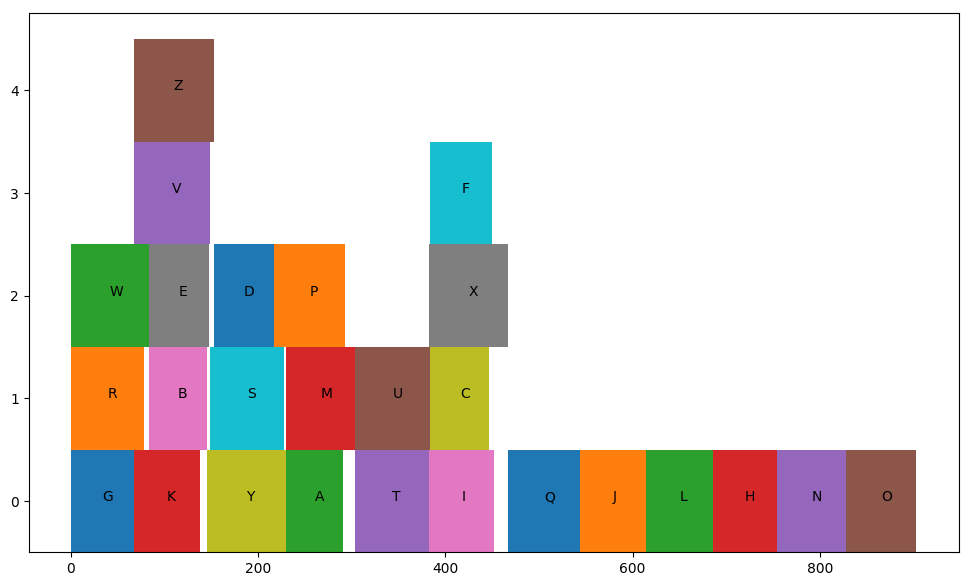

In [12]:
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(12, 7))
for worker, task, start, end in tasks:
    ax.bar(start + (end - start) / 2.0, 1, end - start, worker - 0.5)
    ax.text((start + end) / 2.0, worker, task)
fig

In [1]:
puzzle = '''\
Step W must be finished before step B can begin.
Step G must be finished before step T can begin.
Step B must be finished before step P can begin.
Step R must be finished before step M can begin.
Step K must be finished before step Q can begin.
Step Z must be finished before step X can begin.
Step V must be finished before step S can begin.
Step D must be finished before step U can begin.
Step Y must be finished before step J can begin.
Step A must be finished before step C can begin.
Step M must be finished before step U can begin.
Step E must be finished before step X can begin.
Step T must be finished before step F can begin.
Step U must be finished before step C can begin.
Step C must be finished before step Q can begin.
Step S must be finished before step N can begin.
Step X must be finished before step H can begin.
Step F must be finished before step L can begin.
Step Q must be finished before step J can begin.
Step P must be finished before step J can begin.
Step I must be finished before step L can begin.
Step J must be finished before step L can begin.
Step L must be finished before step N can begin.
Step H must be finished before step O can begin.
Step N must be finished before step O can begin.
Step B must be finished before step S can begin.
Step A must be finished before step T can begin.
Step G must be finished before step K can begin.
Step Z must be finished before step N can begin.
Step V must be finished before step I can begin.
Step Z must be finished before step Q can begin.
Step I must be finished before step J can begin.
Step S must be finished before step I can begin.
Step P must be finished before step I can begin.
Step B must be finished before step C can begin.
Step M must be finished before step L can begin.
Step G must be finished before step Z can begin.
Step M must be finished before step C can begin.
Step U must be finished before step F can begin.
Step B must be finished before step Y can begin.
Step W must be finished before step U can begin.
Step G must be finished before step M can begin.
Step M must be finished before step J can begin.
Step C must be finished before step L can begin.
Step K must be finished before step D can begin.
Step S must be finished before step X can begin.
Step Q must be finished before step N can begin.
Step V must be finished before step N can begin.
Step R must be finished before step C can begin.
Step E must be finished before step H can begin.
Step D must be finished before step P can begin.
Step H must be finished before step N can begin.
Step X must be finished before step O can begin.
Step K must be finished before step Y can begin.
Step R must be finished before step F can begin.
Step L must be finished before step O can begin.
Step Y must be finished before step M can begin.
Step T must be finished before step I can begin.
Step T must be finished before step Q can begin.
Step B must be finished before step F can begin.
Step C must be finished before step N can begin.
Step V must be finished before step M can begin.
Step T must be finished before step N can begin.
Step S must be finished before step L can begin.
Step P must be finished before step H can begin.
Step X must be finished before step Q can begin.
Step Z must be finished before step I can begin.
Step Q must be finished before step O can begin.
Step I must be finished before step N can begin.
Step E must be finished before step P can begin.
Step R must be finished before step L can begin.
Step P must be finished before step L can begin.
Step T must be finished before step H can begin.
Step G must be finished before step X can begin.
Step J must be finished before step H can begin.
Step G must be finished before step V can begin.
Step K must be finished before step N can begin.
Step R must be finished before step Q can begin.
Step Z must be finished before step T can begin.
Step E must be finished before step F can begin.
Step Y must be finished before step H can begin.
Step P must be finished before step N can begin.
Step S must be finished before step O can begin.
Step L must be finished before step H can begin.
Step W must be finished before step E can begin.
Step X must be finished before step N can begin.
Step Z must be finished before step D can begin.
Step A must be finished before step H can begin.
Step T must be finished before step X can begin.
Step E must be finished before step Q can begin.
Step K must be finished before step U can begin.
Step M must be finished before step T can begin.
Step J must be finished before step O can begin.
Step D must be finished before step N can begin.
Step K must be finished before step A can begin.
Step G must be finished before step E can begin.
Step R must be finished before step H can begin.
Step W must be finished before step M can begin.
Step U must be finished before step N can begin.
Step Q must be finished before step H can begin.
Step Y must be finished before step A can begin.
'''